### Breast Cancer

#### 1. Importing the libraries.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings;
warnings.filterwarnings('ignore');


#### 2. Difference between Benign & Malignant Tumor

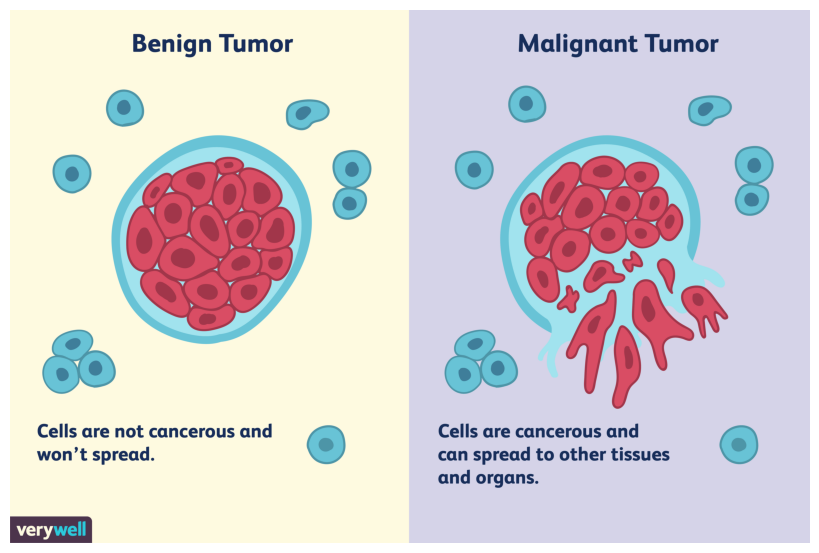

In [7]:
# Open an image file
img = Image.open(r"C:\Users\Faizan mulla\OneDrive\Pictures\Cancer.png")
# Display image
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis('off')
# Adjust subplot parameters to give the appearance of centering
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()

#### 3. Reading a csv file.

In [45]:
new_data = pd.read_csv(r"C:\Users\Faizan mulla\OneDrive\Desktop\data.csv")
df=new_data.iloc[:,[1,2,3,4,5,6,7,8,9,22,23,24,25,26,27,28,29]]
df['diagnosis'].replace({'M':'0','B':'1'},inplace=True)
df['diagnosis'] = df['diagnosis'].astype(int)


#### 4. Displaying the contents of the DataFrame.

In [48]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650


#### 5. Adding Visuals to program.

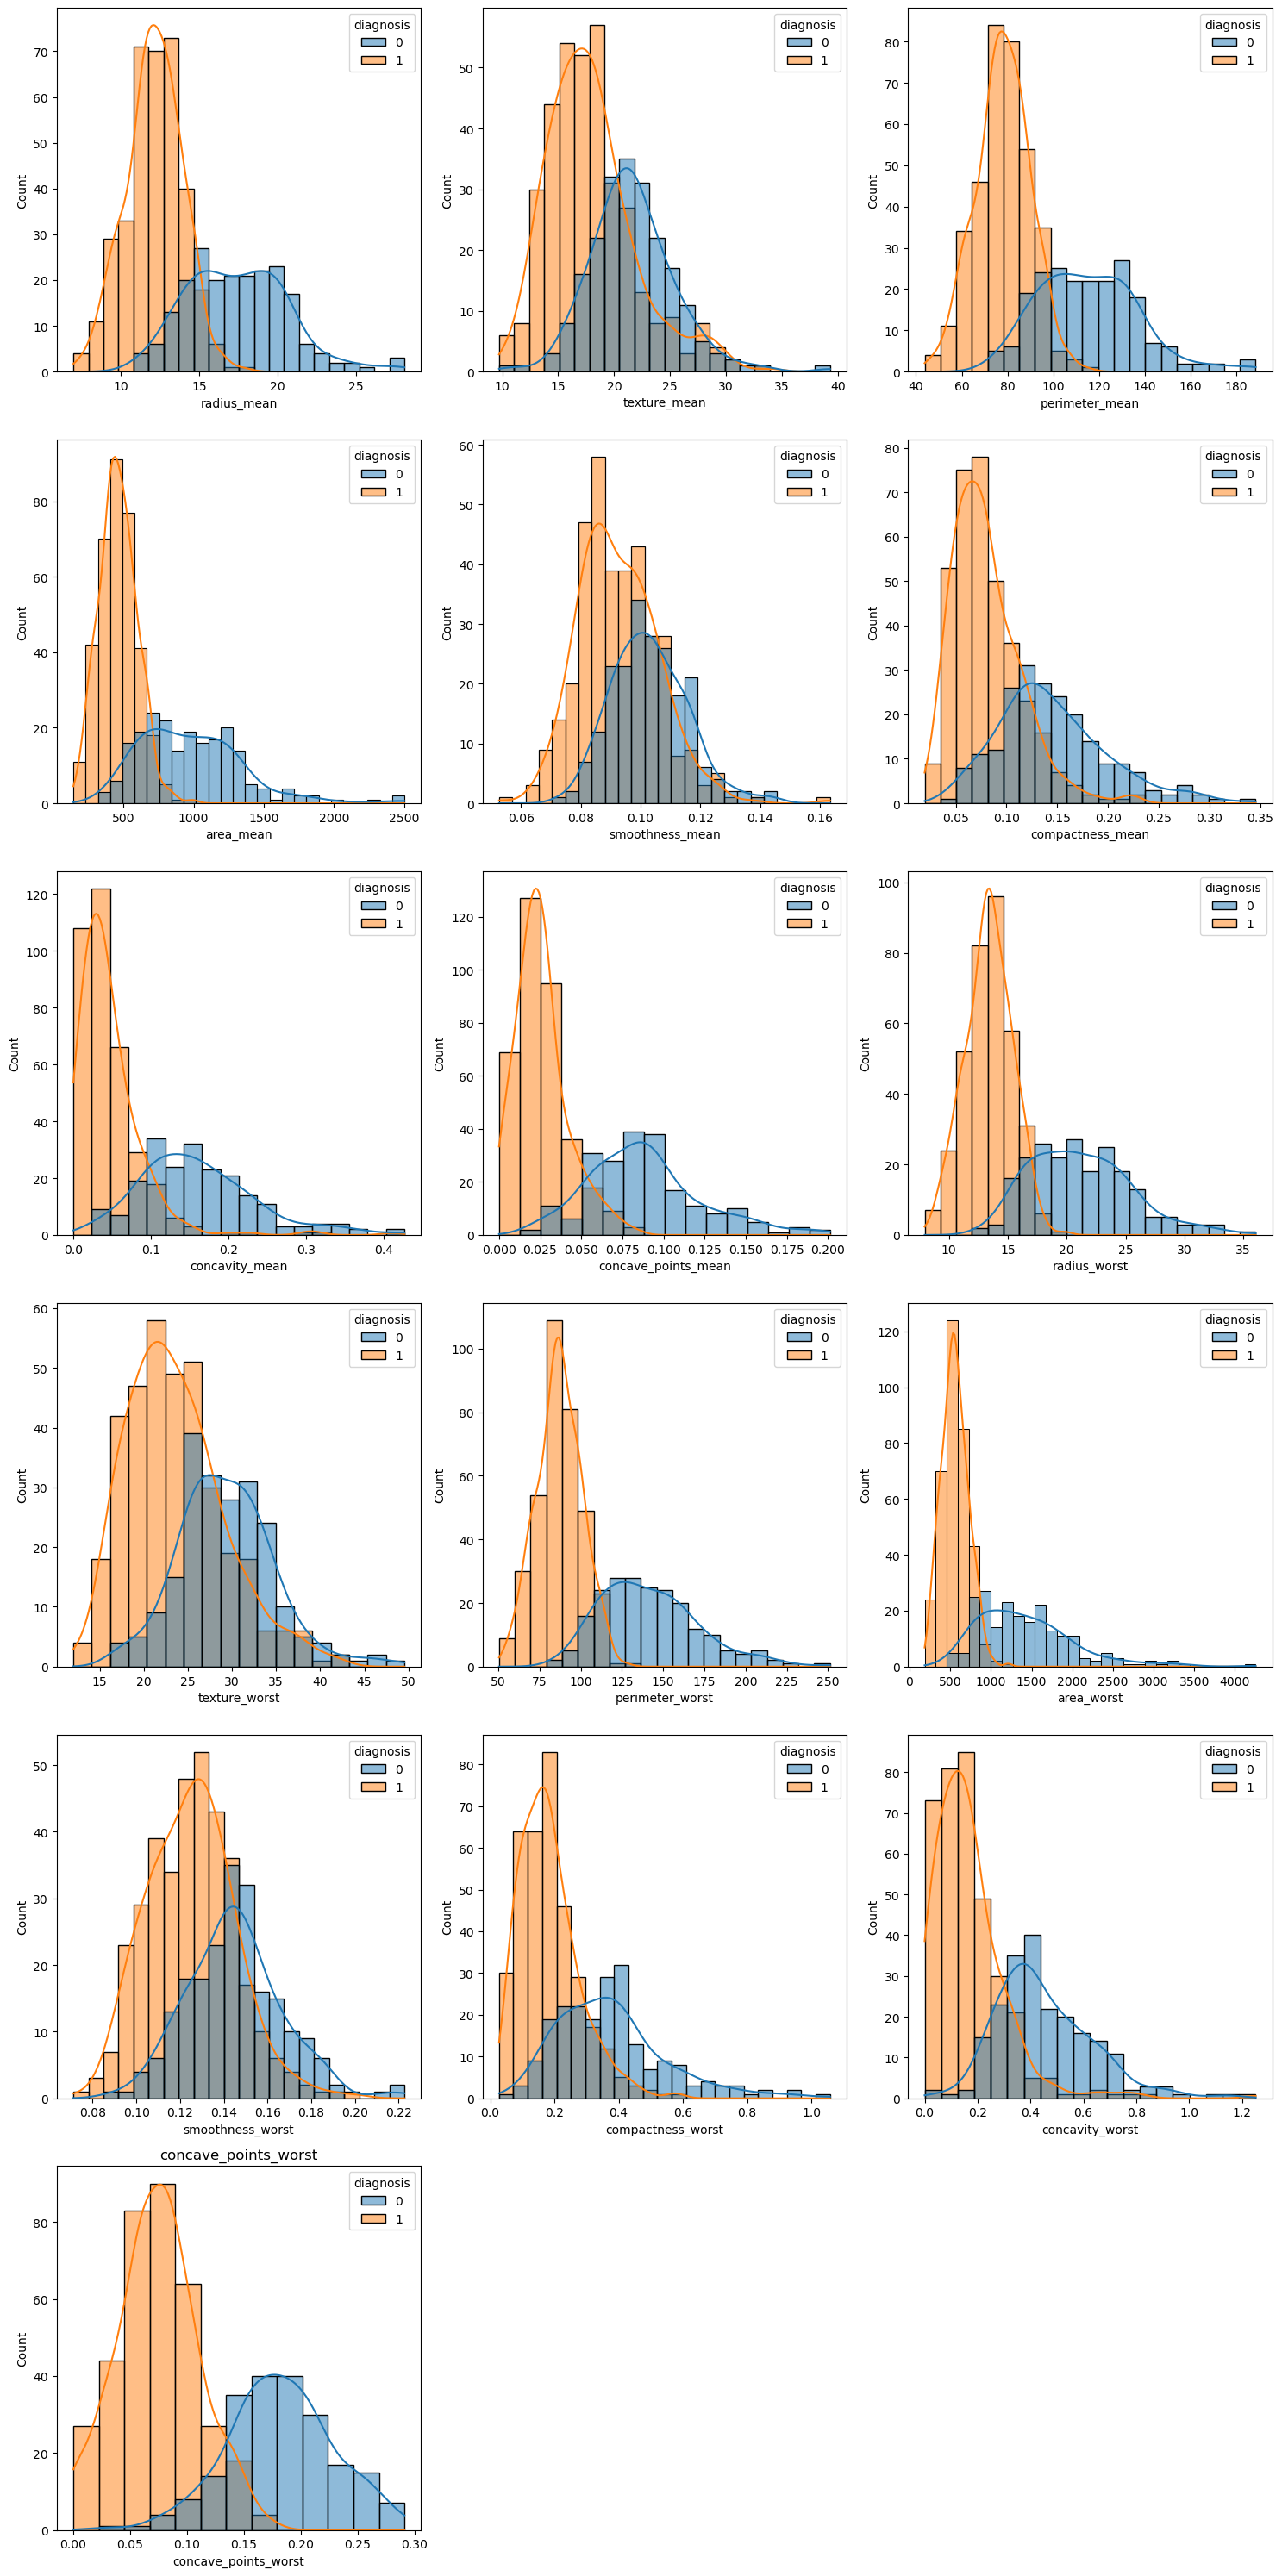

In [53]:
# Number of features
num_features = df.shape[1] - 1 # excluding the target column
# Determine grid size for subplots
nrows = int(np.ceil(num_features / 3))
ncols = 3
# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 *
nrows))
# Flatten axes for easy iteration
axes = axes.flatten()
# Plot each feature in a subplot
for i, col in enumerate(df.columns[1:]): # Exclude the first column(id)
 sns.histplot(data=df, x=col, hue='diagnosis', ax=axes[i],kde=True)
axes[i].set_title(col)
# Remove any empty subplots
for j in range(i + 1, len(axes)):
 fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

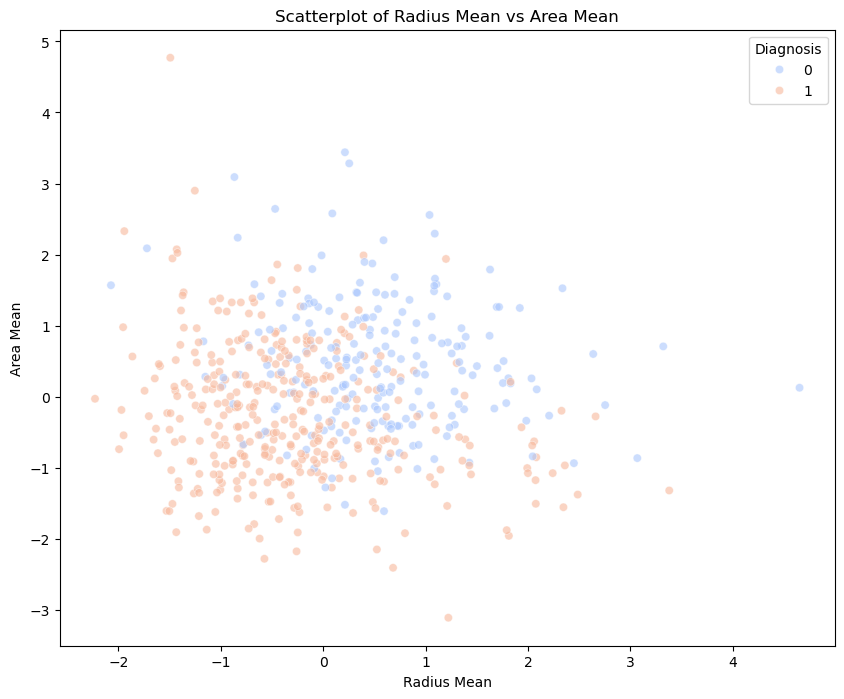

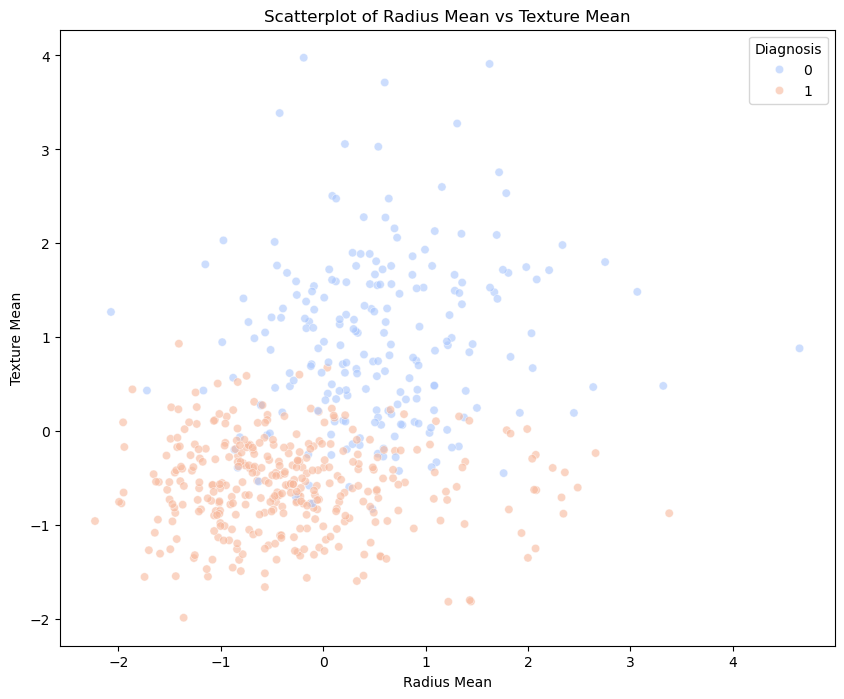

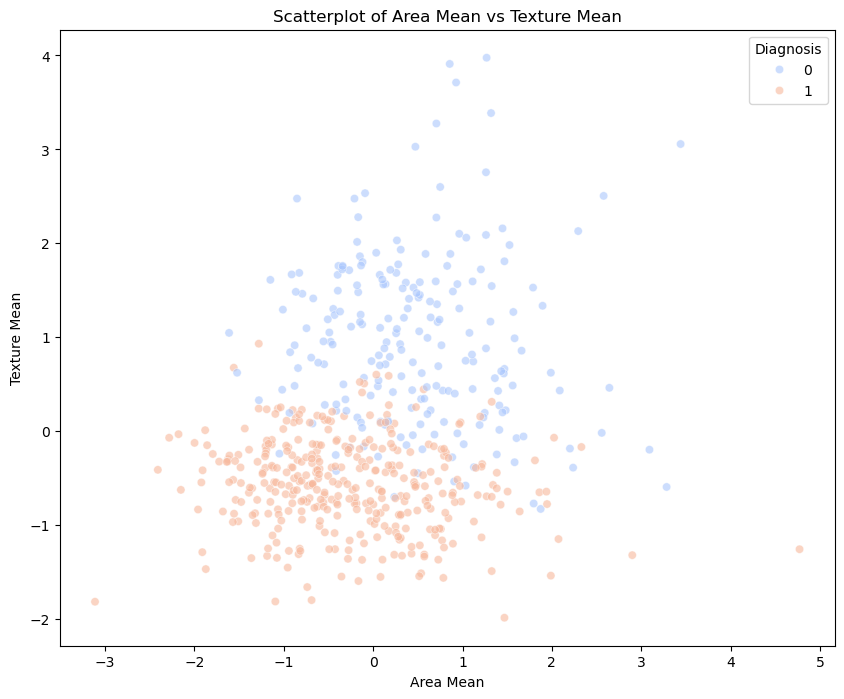

In [63]:
scaled_df =pd.DataFrame(StandardScaler().fit_transform(df.drop(columns=['diagnosis'])), columns=df.columns[:-1])
scaled_df['diagnosis'] = df['diagnosis']
# Scatterplot of Age vs BMI
plt.figure(figsize=(10, 8))
sns.scatterplot(data=scaled_df, x='radius_mean', y='area_mean',
hue='diagnosis', palette='coolwarm', alpha=0.6)
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')
plt.title('Scatterplot of Radius Mean vs Area Mean')
plt.legend(title='Diagnosis')
plt.show()
# Scatterplot of Age vs HbA1c Level
plt.figure(figsize=(10, 8))
sns.scatterplot(data=scaled_df, x='radius_mean', y='texture_mean',
hue='diagnosis', palette='coolwarm', alpha=0.6)
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Scatterplot of Radius Mean vs Texture Mean')
plt.legend(title='Diagnosis')
plt.show()
# Scatterplot of BMI vs HbA1c Level
plt.figure(figsize=(10, 8))
sns.scatterplot(data=scaled_df, x='area_mean', y='texture_mean',
hue='diagnosis', palette='coolwarm', alpha=0.6)
plt.xlabel('Area Mean')
plt.ylabel('Texture Mean')
plt.title('Scatterplot of Area Mean vs Texture Mean')
plt.legend(title='Diagnosis')
plt.show()

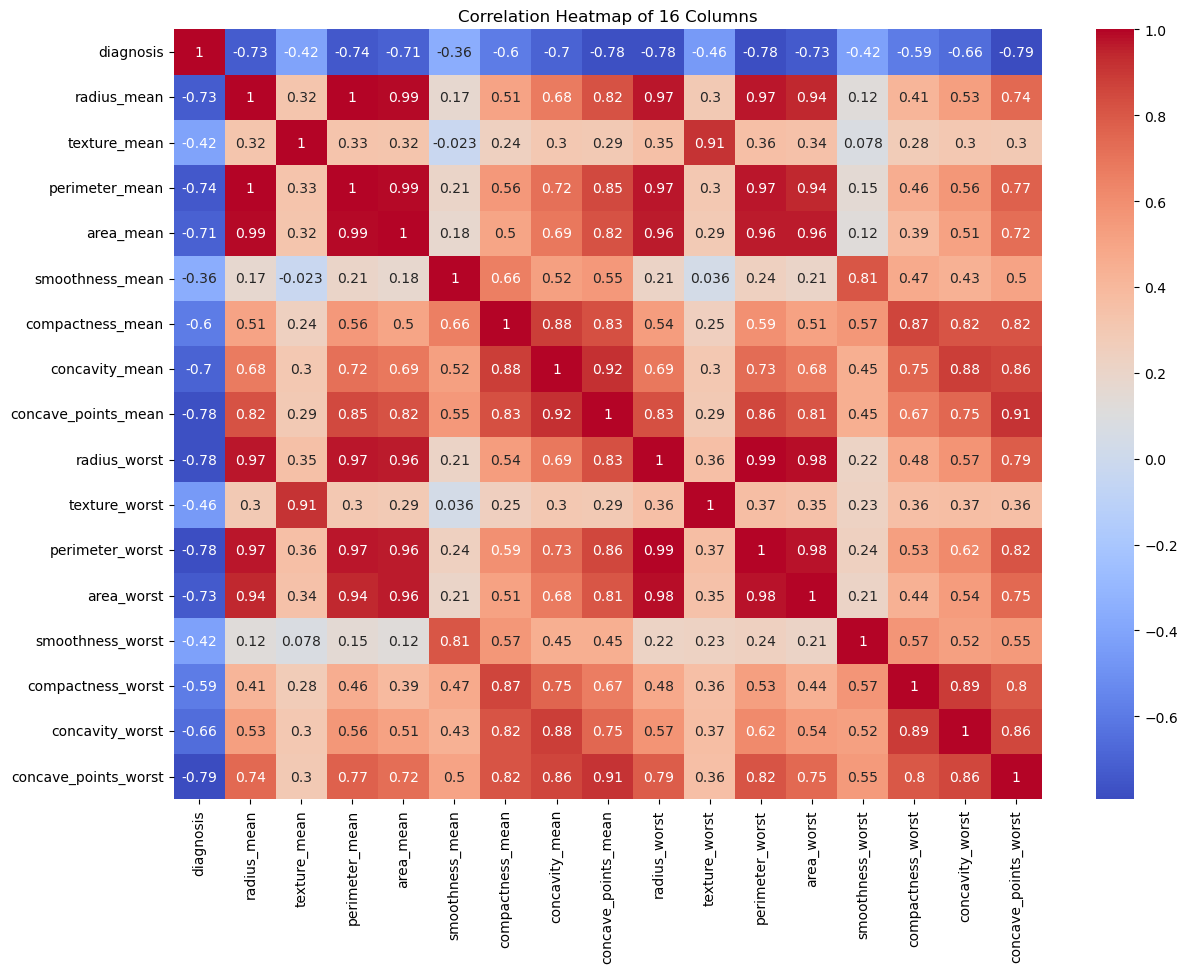

In [65]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of 16 Columns')
plt.show()

#### 6. Performing a train-test split on the given DataFrame.

In [68]:
# Separate the target column
target_column = 'diagnosis'
# Standardize the dataset
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop(target_column, axis=1))
# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df.drop(target_column,
axis=1).columns)
scaled_df[target_column] = df[target_column].values

#### 7. Training and testing the given DataFrame.

In [71]:
# Split the data into training and testing sets
X = scaled_df.drop(target_column, axis=1)
y = scaled_df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the logistic regression model
model = LogisticRegression()
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_report = metrics.classification_report(y_test, y_pred)
# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.97

Confusion Matrix:
[[41  2]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [73]:
# Additional Evaluation Metrics
print("\nAdditional Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print("Precision: {:.2f}".format(metrics.precision_score(y_test,
y_pred)))
print("Recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)))
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1, 'current': 2})
# Additional Evaluation Metrics
print("\nAdditional Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print("Precision: {:.2f}".format(metrics.precision_score(y_test,
y_pred)))
print("Recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)))
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1, 'current': 2})


Additional Evaluation Metrics:
Accuracy: 0.97
Precision: 0.97
Recall: 0.99

Additional Evaluation Metrics:
Accuracy: 0.97
Precision: 0.97
Recall: 0.99
